In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

### Discriminant analysis

In [1]:
cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

In [2]:
def dataset_fixed_cov():
    """Generate 2 Gaussians samples with the same covariance matrix"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -0.5], [1, 0.5]])
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    """Generate 2 Gaussians samples with different covariance matrices"""
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [2.5, 1.0]]) * 3.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([0, 4]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

In [3]:
from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
        plt.ylabel("Same covariance matrix in both groups")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")
    elif fig_index == 3:
        plt.ylabel("Different covariance matrices")

    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099")  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        #"*",
        #color="black",
        #markersize=15,
        #markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        #"*",
        #color="black",
        #markersize=15,
        #markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

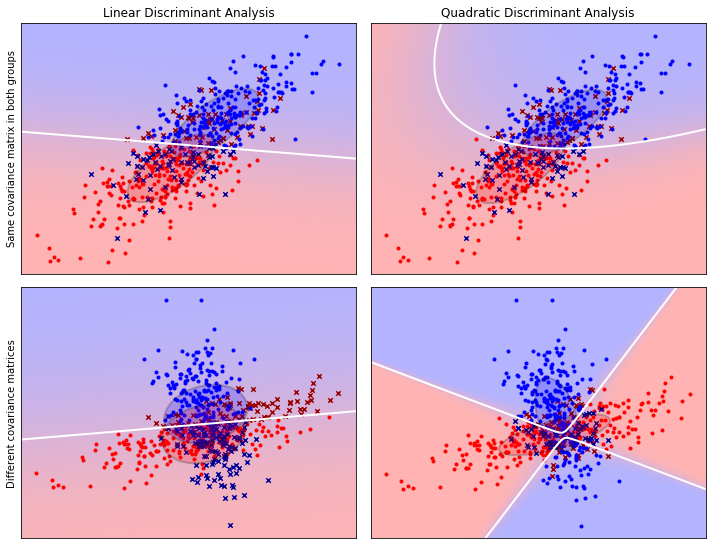

In [4]:
plt.figure(figsize=(10, 8), facecolor="white")
#plt.suptitle(
#    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
#    y=0.98,
#    fontsize=15,
#)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis("tight")

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Logistic regression

### Ridge regression

In [9]:
import pandas as pd

In [10]:
# In this section, random forests are used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('./BRinf')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [11]:
# number of observations, number of variables
df.shape

(156, 93)

In [12]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
Y_train = df.iloc[0:nb_data_train,1] 
Y_test  = df.iloc[-nb_diff:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [13]:
# other variables
X_train = df.iloc[0:nb_data_train,2:] 
X_test  = df.iloc[-nb_diff:,2:] 
X_test.head()

,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,CNI Brazil Manufacture Industr,CNI Brazil Manufacture Industr.1,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
140,0.20,0.02,0.110,0.31,6.34,38551.0,580,-0.22,-0.1,81.8,...,0.35,0.41,0.1849,0.43,0.1849,0.04,0.2500,0.49,0.2401,0.05
141,0.28,0.59,3.158,0.02,6.38,38798.0,-266,-0.63,0.3,82.3,...,0.40,0.53,0.2500,0.50,0.2500,0.04,0.3249,0.58,0.3364,0.05
142,0.98,1.14,6.098,0.82,6.57,40100.0,61,-0.76,-0.6,82.6,...,0.52,0.64,0.3025,0.59,0.3481,0.05,0.5476,0.72,0.5184,0.08
143,0.62,0.38,2.089,0.98,6.67,40950.0,327,-1.48,-0.1,82.0,...,0.64,0.71,0.4900,0.75,0.5625,0.05,0.9409,0.97,0.9409,0.12
144,0.76,0.67,3.672,0.42,7.01,39673.0,-773,-0.82,-0.2,78.6,...,0.72,0.69,1.9600,1.18,1.3924,0.11,1.0201,0.99,0.9801,0.16


In [14]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 20))
reg_lin = linear_model.Ridge(alpha= 0.0)

In [15]:
reg.fit(X_train, Y_train)
reg_lin.fit(X_train, Y_train)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
y_hat = reg.predict(X_train)
y_hat_lin = reg_lin.predict(X_train)

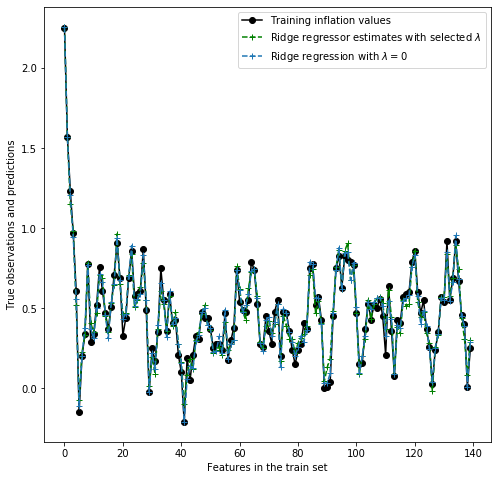

In [24]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values,marker='o',color='k')
plt.plot(y_hat,'g--',marker='+')
plt.plot(y_hat_lin,'o--',marker='+')
plt.legend(labels=('Training inflation values',r'Ridge regressor estimates with selected $\lambda$','Ridge regression with $\lambda = 0$'))

In [29]:
y_hat = reg.predict(X_test)
y_hat_lin = reg_lin.predict(X_test)
Y_test.values

array([0.57, 0.42, 0.51, 0.78, 1.24, 1.22, 1.32, 0.71, 0.74, 0.79, 0.62,
       0.22, 0.54, 0.82, 1.01, 0.96])

In [30]:
from sklearn.metrics import mean_squared_error

0.015562799068618757

In [31]:
mean_squared_error(y_hat,Y_test.values)

0.015562799068618757

In [32]:
mean_squared_error(y_hat_lin,Y_test.values)

0.39813343733301065

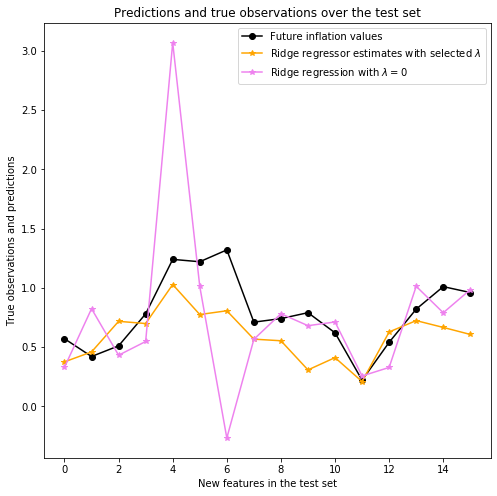

In [63]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the test set")
plt.xlabel("New features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values,marker='o',color='k')
plt.plot(y_hat,marker='*',color='orange')
plt.plot(y_hat_lin,marker='*',color='violet')
plt.legend(labels=('Future inflation values',r'Ridge regressor estimates with selected $\lambda$','Ridge regression with $\lambda = 0$'))

In [57]:
n_alphas = 100
alphas = np.logspace(-10, 2, n_alphas)
coefs = []
rmse = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)
    y_hat = ridge.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73376e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73378e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73379e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.73381e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond

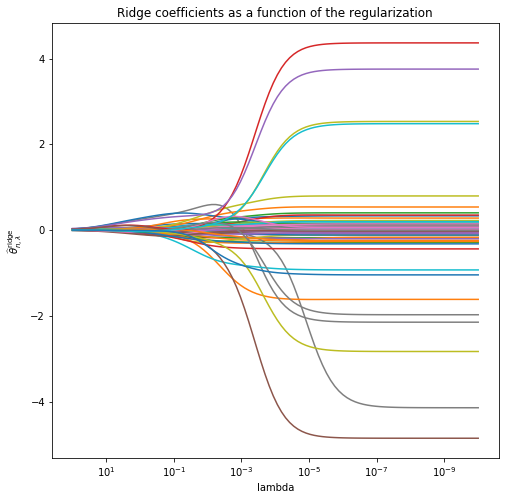

In [58]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{ridge}}_{n,\lambda}$')
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

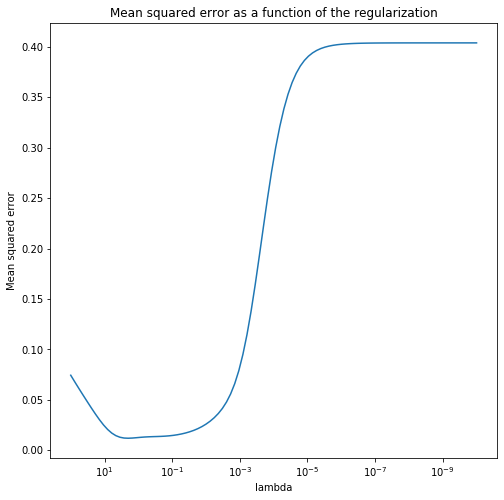

In [59]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, rmse)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

### Lasso Regression

In [81]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [88]:
n_alphas = 100
alphas = np.logspace(-10, -1, n_alphas)

In [112]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))


C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\lecorff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

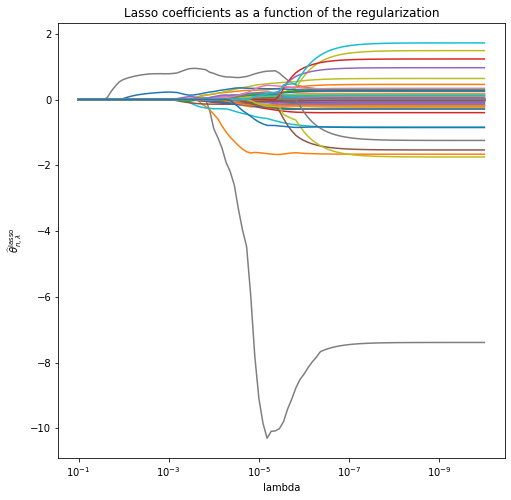

In [113]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

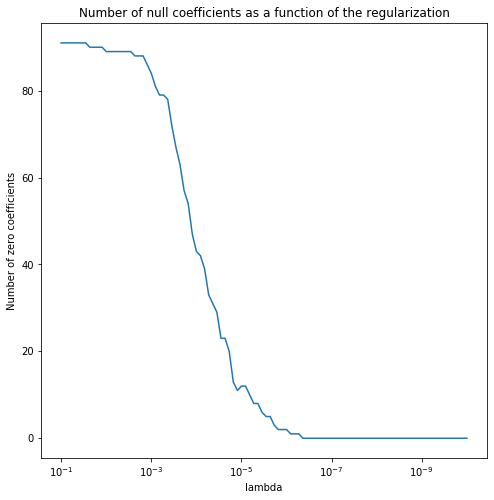

In [114]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Number of zero coefficients')
plt.title("Number of null coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

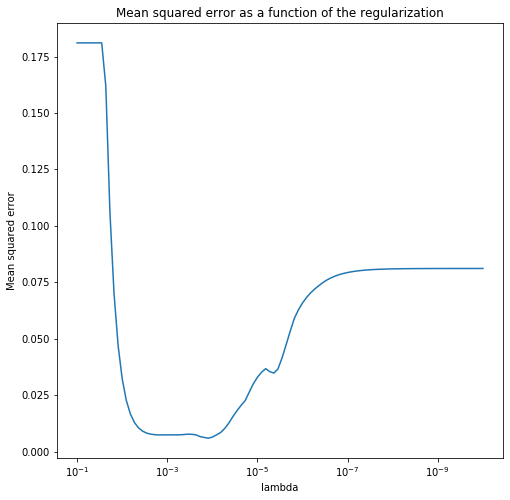

In [115]:
plt.figure(1,figsize=(8,8))
ax = plt.gca()
ax.plot(alphas, rmse)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

In [103]:
lasso.coef_

array([ 0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])